In [1]:
import os
import nibabel as nib
import numpy as np

import matplotlib.pyplot as plt

File: C:\Users\Student11\Documents\git\MedImaging\mi2025_t03\MI2022_TeamWork_data\artif_01_bold.nii.gz
Nb of dimensions: 4
Shape: (72, 72, 36, 836)
x = left (0)   |   right (72)
y = anterior/behind skull (0)  |   posterior/front/eye (72)
z = bottom/base neck (0)   |   top/top skull (36)
v = nb of volumes (0)   |   nb of time points (836)
Voxel size: (np.float32(3.0), np.float32(3.0), np.float32(3.75), np.float32(0.0))
Affine:
[[-3.00000000e+00  0.00000000e+00  0.00000000e+00  1.04385544e+02]
 [ 0.00000000e+00  2.99851966e+00 -1.17790341e-01 -9.14410782e+01]
 [ 0.00000000e+00  9.42322612e-02  3.74814963e+00 -4.17823143e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Data type: float64
Min: 0.0, Max: 45181.99806690216, Mean: 3196.432537755791


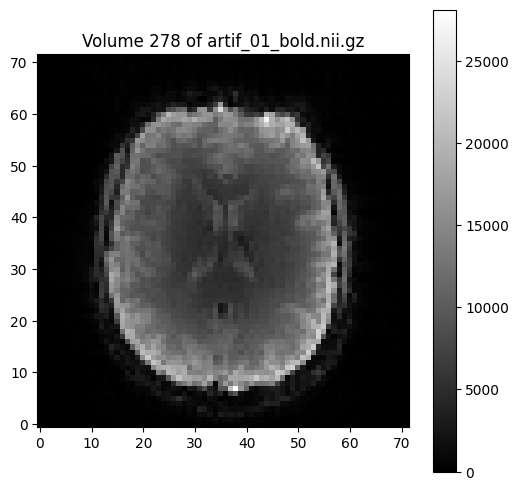

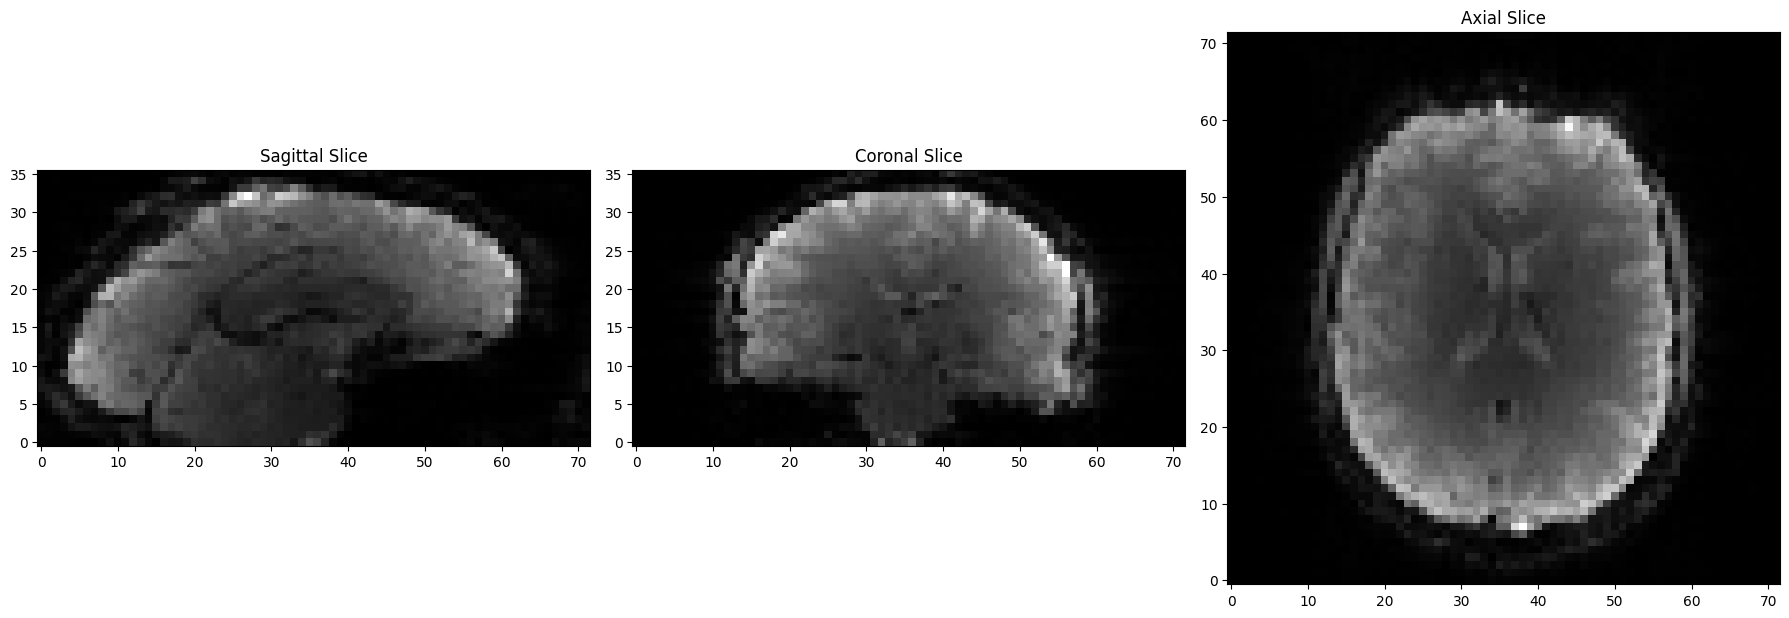

In [2]:
folder_path = r'C:\Users\Student11\Documents\git\MedImaging\mi2025_t03\MI2022_TeamWork_data'

# List all .nii.gz files in the folder
nii_files = [f for f in os.listdir(folder_path) if f.endswith('.nii.gz')]

# Process each file
for file in nii_files:
    file_path = os.path.join(folder_path, file)
    
    
    # Load the .nii.gz file
    img = nib.load(file_path)
    data = img.get_fdata()
    
    # Display basic information
    print(f"File: {file_path}")
    # taking up view
    print(f"Nb of dimensions: {data.ndim}")
    print(f"Shape: {data.shape}")
    print(f"x = left (0)   |   right ({data.shape[0]})")
    print(f"y = anterior/behind skull (0)  |   posterior/front/eye ({data.shape[1]})")
    print(f"z = bottom/base neck (0)   |   top/top skull ({data.shape[2]})")
    print(f"v = nb of volumes (0)   |   nb of time points ({data.shape[3]})")
    
    print(f"Voxel size: {img.header.get_zooms()}")
    print(f"Affine:\n{img.affine}")
    print(f"Data type: {data.dtype}")
    print(f"Min: {np.min(data)}, Max: {np.max(data)}, Mean: {np.mean(data)}")
    
    # Plot a middle slice (assuming 3D data)
    volume_index = data.shape[3] // 3
    middle_slice = data[:, :, data.shape[2]//2, volume_index]
    plt.figure(figsize=(6, 6))
    plt.imshow(middle_slice.T, cmap='gray', origin='lower')
    plt.title(f"Volume {volume_index} of {file}")
    plt.colorbar()
    plt.show()
    
    # Plot axial, sagittal, and coronal cuts
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))


    # Sagittal cut (x-axis)
    sagittal_slice = data[data.shape[0] // 2, :, :, 0]
    axes[0].imshow(sagittal_slice.T, cmap='gray', origin='lower')
    axes[0].set_title('Sagittal Slice')

    # Coronal cut (y-axis)
    coronal_slice = data[:, data.shape[1] // 2, :, 0]
    axes[1].imshow(coronal_slice.T, cmap='gray', origin='lower')
    axes[1].set_title('Coronal Slice')
    
    # Axial cut (z-axis)
    axial_slice = data[:, :, data.shape[2] // 2, 0]
    axes[2].imshow(axial_slice.T, cmap='gray', origin='lower')
    axes[2].set_title('Axial Slice')

    plt.tight_layout()
    plt.show()
    
    break

In [3]:
# choose one dimension
data_plot = data[:, :, :, data.shape[3]//2]
print(data_plot.shape) # (sagittal=72, coronal=72, axial=36)

(72, 72, 36)


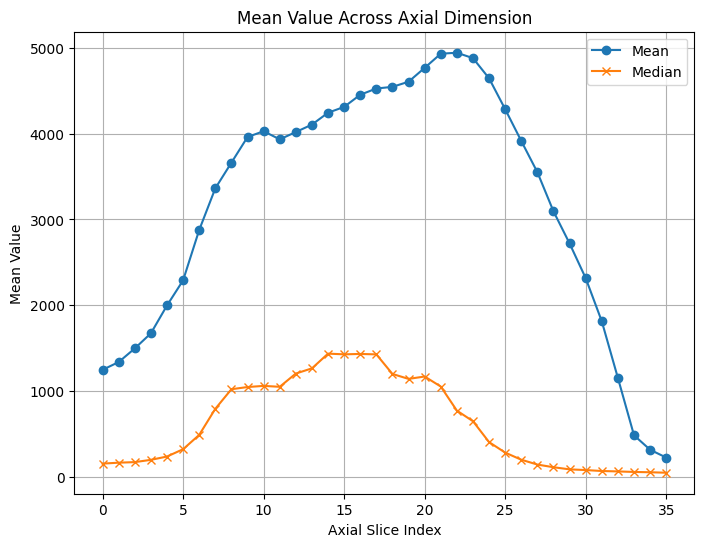

In [4]:
# Calculate the mean value along the sagittal and coronal dimensions for each axial slice
axial_means = data_plot.mean(axis=(0, 1))
axial_medians = np.median(data_plot, axis=(0, 1))


# Plot the mean values
plt.figure(figsize=(8, 6))
plt.plot(range(data_plot.shape[2]), axial_means, marker='o')
plt.plot(range(data_plot.shape[2]), axial_medians, marker='x')
plt.title('Mean Value Across Axial Dimension')
plt.xlabel('Axial Slice Index')
plt.ylabel('Mean Value')
plt.grid(True)
plt.legend(['Mean', 'Median'])
plt.show()

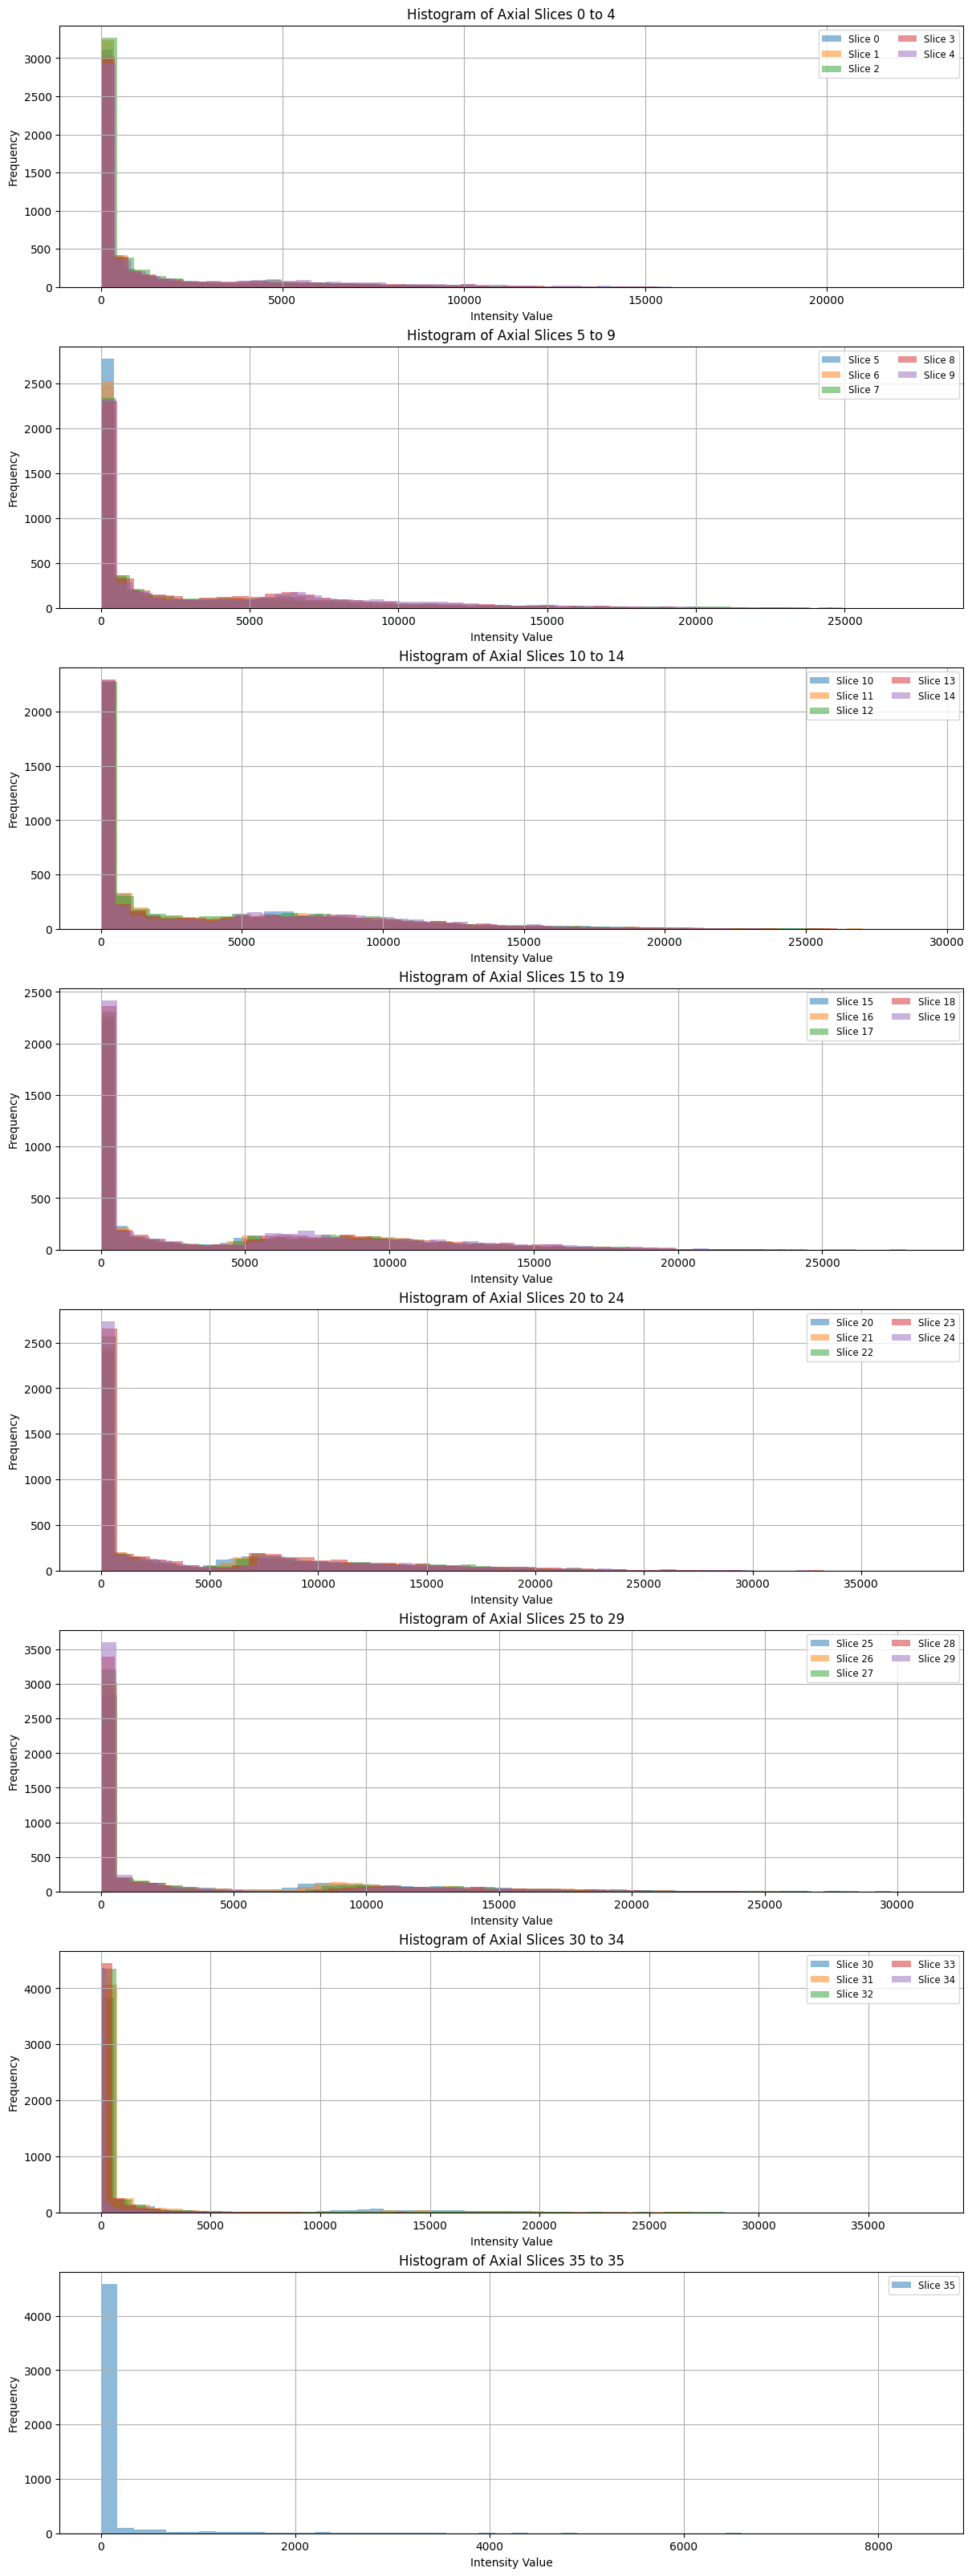

In [5]:
num_slices = data_plot.shape[2]
slices_per_subplot = 5
num_subplots = (num_slices + slices_per_subplot - 1) // slices_per_subplot  # Calculate the number of subplots

fig, axes = plt.subplots(num_subplots, 1, figsize=(12, 4 * num_subplots), constrained_layout=True)

for subplot_idx in range(num_subplots):
    ax = axes[subplot_idx] if num_subplots > 1 else axes
    start_slice = subplot_idx * slices_per_subplot
    end_slice = min(start_slice + slices_per_subplot, num_slices)
    
    for i in range(start_slice, end_slice):
        ax.hist(data_plot[:, :, i].flatten(), bins=50, alpha=0.5, label=f'Slice {i}')
    
    ax.set_title(f'Histogram of Axial Slices {start_slice} to {end_slice - 1}')
    ax.set_xlabel('Intensity Value')
    ax.set_ylabel('Frequency')
    ax.legend(loc='upper right', fontsize='small', ncol=2)
    ax.grid(True)

plt.show()

Volume Min: 0.0, Volume Max: 37820.23144817352


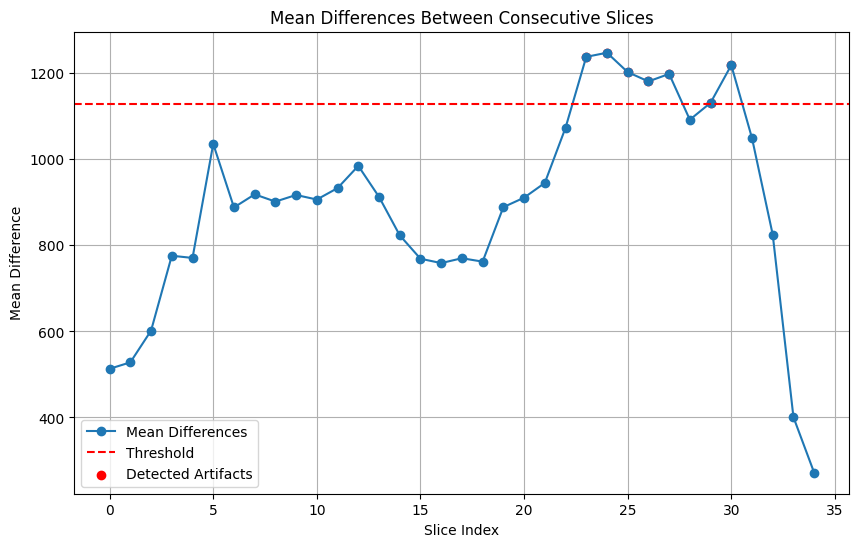

Artifact detected at slice 23


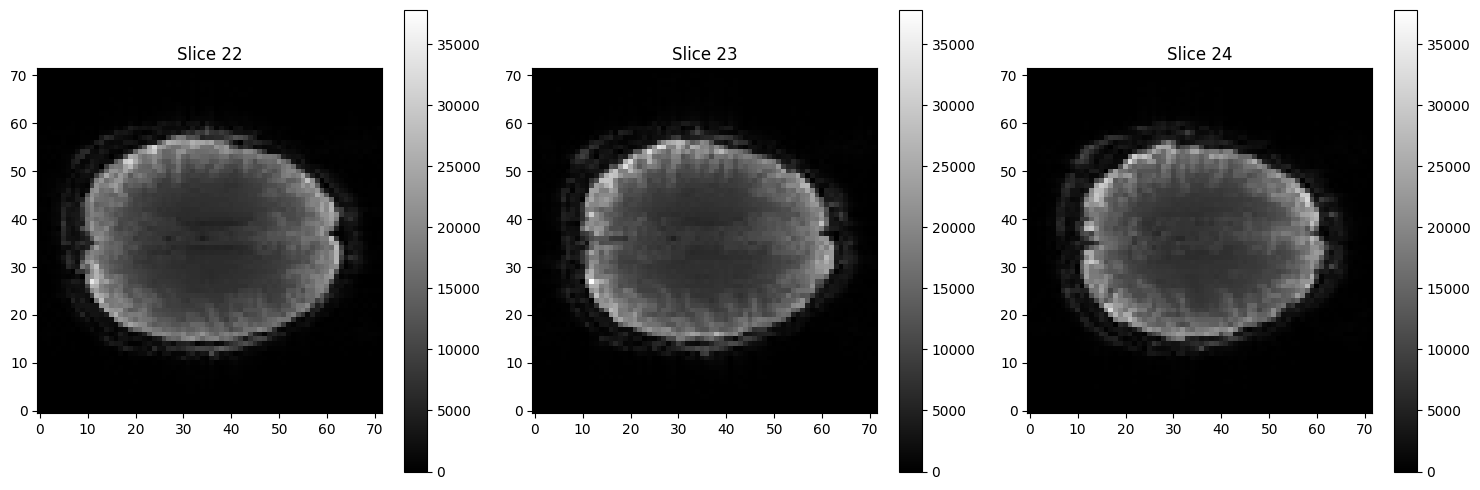

Artifact detected at slice 24


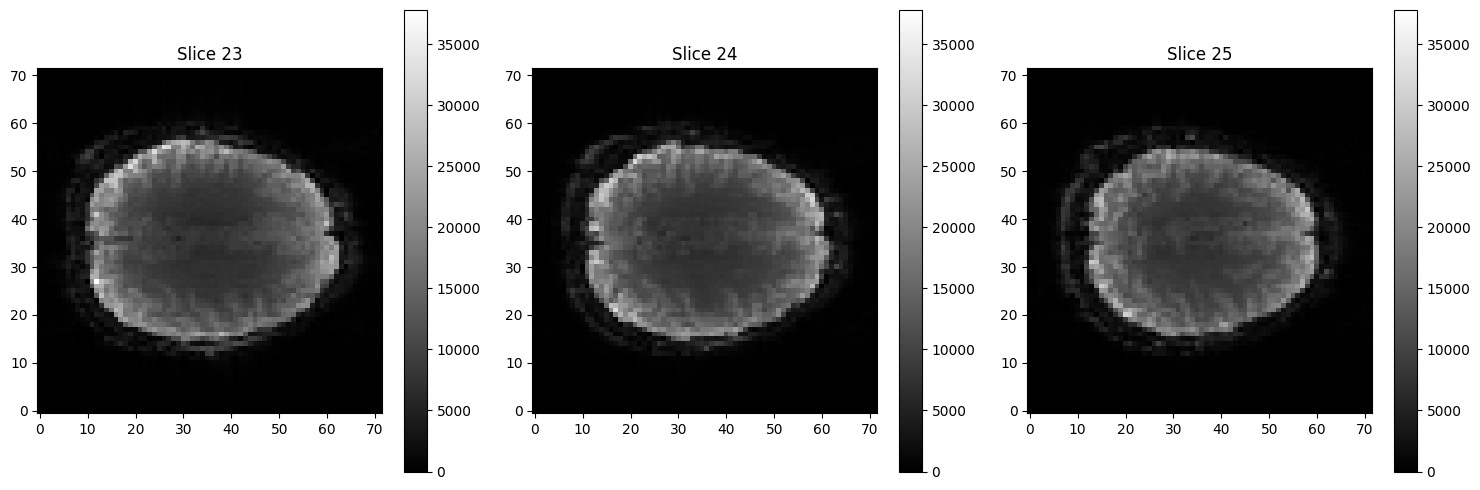

Artifact detected at slice 25


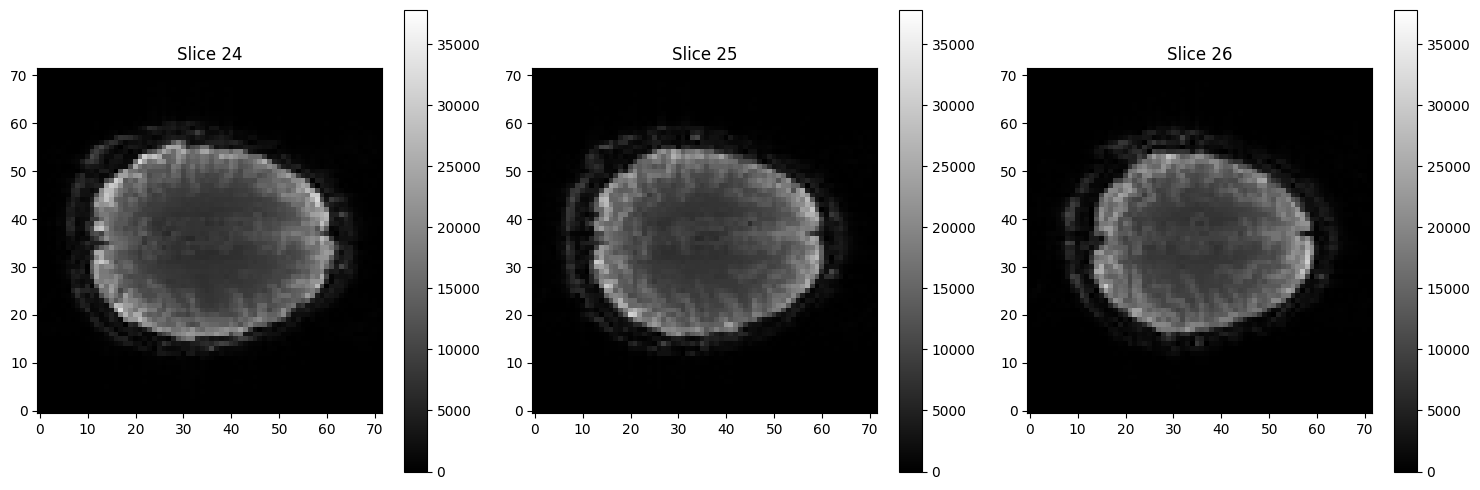

Artifact detected at slice 26


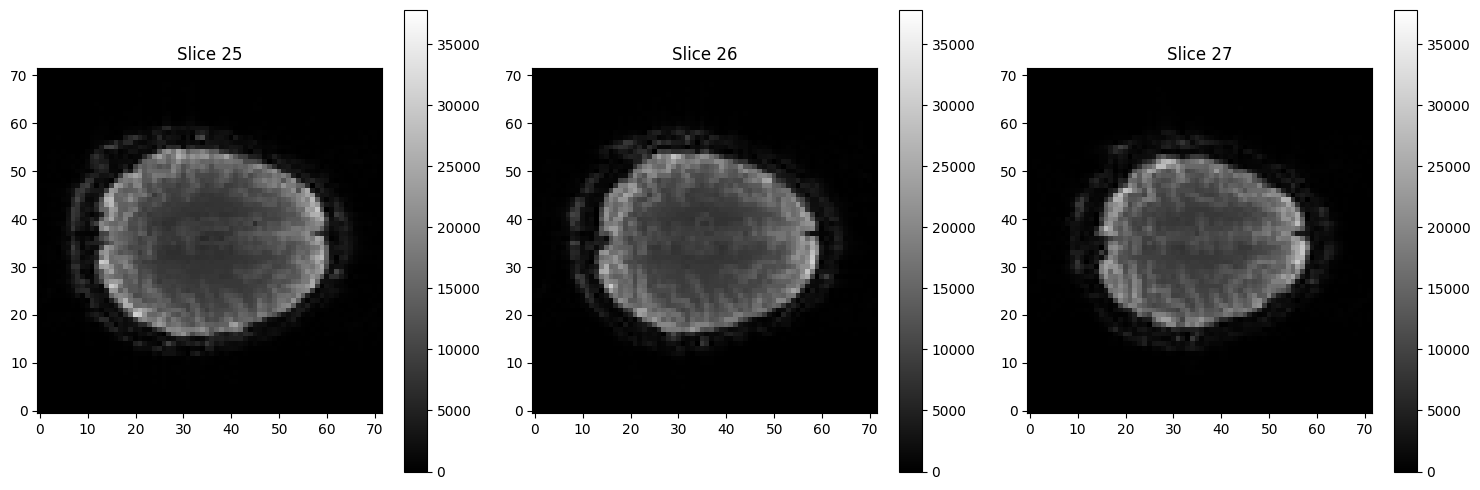

Artifact detected at slice 27


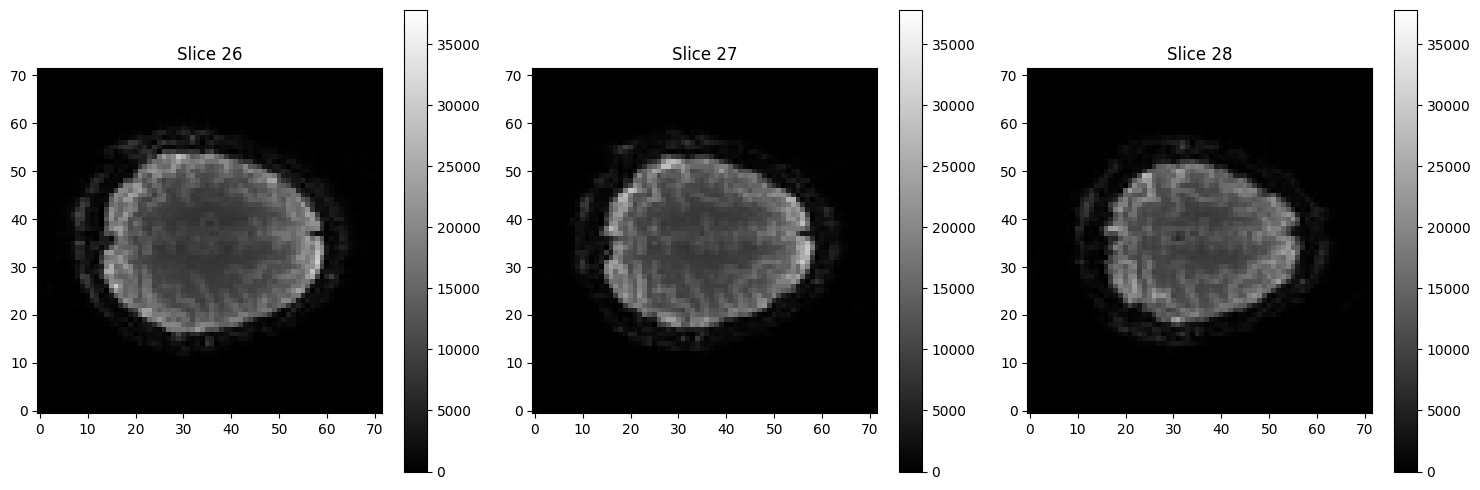

Artifact detected at slice 29


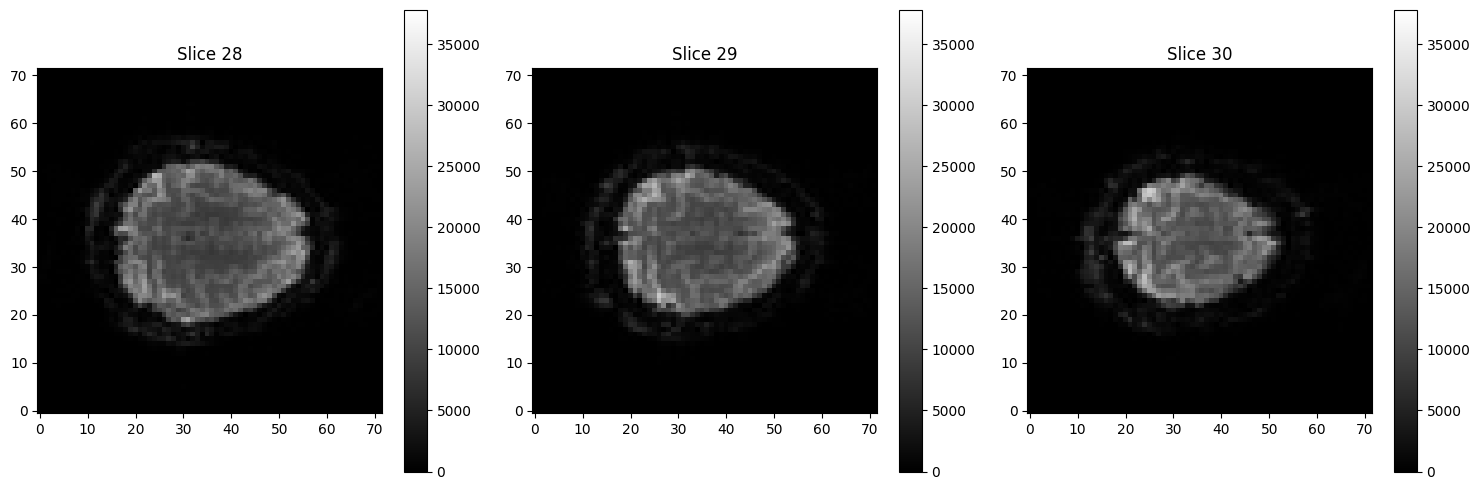

Artifact detected at slice 30


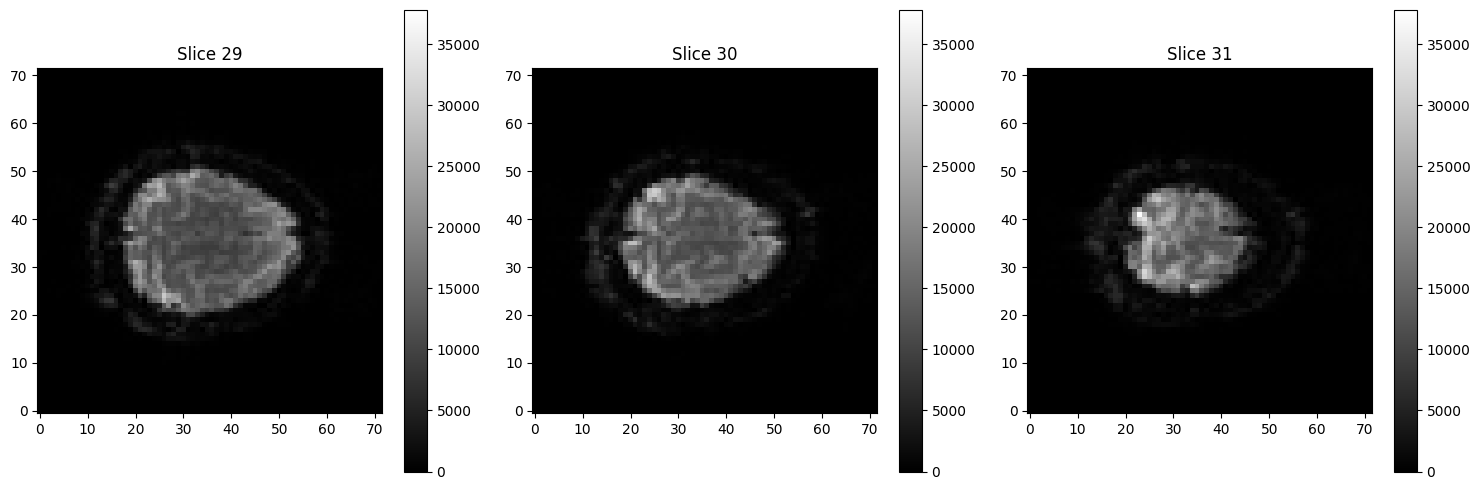

In [12]:
# Calculate the voxel-wise difference between consecutive slices
slice_differences = np.abs(np.diff(data_plot, axis=2))

# Calculate the mean difference for each slice
mean_differences = slice_differences.mean(axis=(0, 1))

# Set a threshold to detect artifacts (e.g., mean difference > 3 standard deviations above the mean)
threshold = mean_differences.mean() + 1 * mean_differences.std()
artifact_slices = np.where(mean_differences > threshold)[0]

volume_min = np.min(data_plot)
volume_max = np.max(data_plot)
print(f"Volume Min: {volume_min}, Volume Max: {volume_max}")

# Plot the mean differences to visualize the threshold and detected artifacts
plt.figure(figsize=(10, 6))
plt.plot(range(len(mean_differences)), mean_differences, marker='o', label='Mean Differences')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.scatter(artifact_slices, mean_differences[artifact_slices], color='red', label='Detected Artifacts')
plt.title('Mean Differences Between Consecutive Slices')
plt.xlabel('Slice Index')
plt.ylabel('Mean Difference')
plt.legend()
plt.grid(True)
plt.show()

# Plot the i-1, i, and i+1 slices for each detected artifact
for artifact_slice in artifact_slices:
    print(f"Artifact detected at slice {artifact_slice}")
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    if artifact_slice > 0:
        im0 = axes[0].imshow(data_plot[:, :, artifact_slice - 1], cmap='gray', origin='lower', vmin=volume_min, vmax=volume_max)
        axes[0].set_title(f'Slice {artifact_slice - 1}')
        fig.colorbar(im0, ax=axes[0], orientation='vertical')
    else:
        axes[0].axis('off')
    
    im1 = axes[1].imshow(data_plot[:, :, artifact_slice], cmap='gray', origin='lower', vmin=volume_min, vmax=volume_max)
    axes[1].set_title(f'Slice {artifact_slice}')
    fig.colorbar(im1, ax=axes[1], orientation='vertical')
    
    if artifact_slice < data_plot.shape[2] - 1:
        im2 = axes[2].imshow(data_plot[:, :, artifact_slice + 1], cmap='gray', origin='lower', vmin=volume_min, vmax=volume_max)
        axes[2].set_title(f'Slice {artifact_slice + 1}')
        fig.colorbar(im2, ax=axes[2], orientation='vertical')
    else:
        axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

(5184, 36)
Threshold for filtering voxels: 5074.941838609739
Filtered voxels shape: (1909, 36)


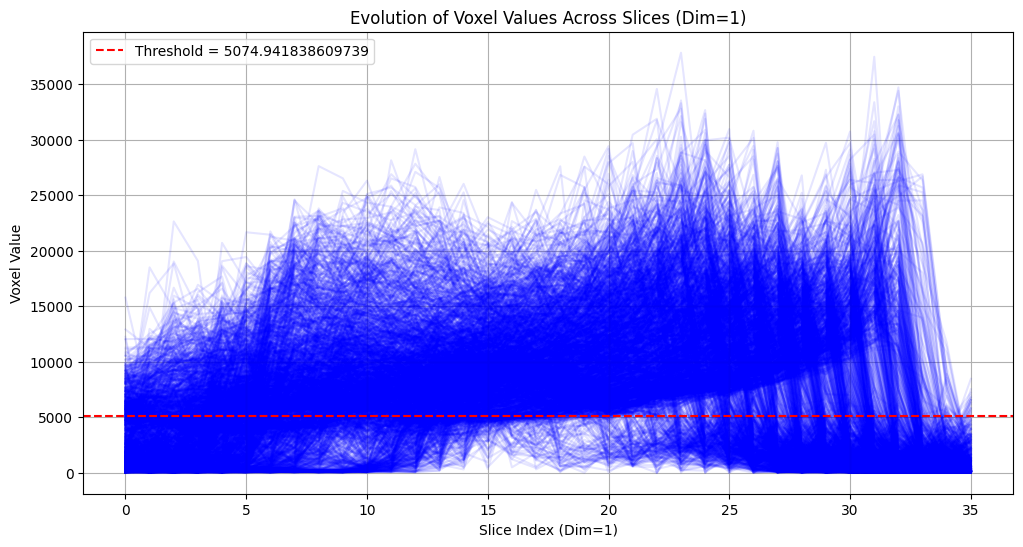

In [10]:
flattened_data = data_plot.reshape(-1, data_plot.shape[2])
print(flattened_data.shape)  # Should print (72*72, 36)

# Calculate the mean of each voxel across slices
voxel_means = flattened_data.mean(axis=1)

# Filter voxels with a mean above the threshold
threshold = 1.5 * voxel_means.std()
print(f"Threshold for filtering voxels: {threshold}")
filtered_voxels = flattened_data[voxel_means >= threshold]
print(f"Filtered voxels shape: {filtered_voxels.shape}")

# Plot the evolution of voxel values across the 36 slices (dim=1)
plt.figure(figsize=(12, 6))
for voxel_idx in range(filtered_voxels.shape[0]):
    plt.plot(range(filtered_voxels.shape[1]), filtered_voxels[voxel_idx, :], alpha=0.1, color='blue')

# Plot the threshold line
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')

plt.title('Evolution of Voxel Values Across Slices (Dim=1)')
plt.xlabel('Slice Index (Dim=1)')
plt.ylabel('Voxel Value')
plt.legend()
plt.grid(True)
plt.show()